In [ ]:
from data_pipe import *

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
train_samples, test_samples = load_samples_metadata(False)

Loading TRAINING data from /Users/lfiaschi/workspace/udacity/CarND-Behavioral-Cloning-P3/data/udacity_data
Loading TRAINING data from /Users/lfiaschi/workspace/udacity/CarND-Behavioral-Cloning-P3/data/luca_track2_lap8_data
Loading TRAINING data from /Users/lfiaschi/workspace/udacity/CarND-Behavioral-Cloning-P3/data/luca_track1_lap7_data
Loading TRAINING data from /Users/lfiaschi/workspace/udacity/CarND-Behavioral-Cloning-P3/data/luca_track1_lap5_data
Loading TRAINING data from /Users/lfiaschi/workspace/udacity/CarND-Behavioral-Cloning-P3/data/luca_track1_hard_turn_data
Loading TRAINING data from /Users/lfiaschi/workspace/udacity/CarND-Behavioral-Cloning-P3/data/betta_track2_lap6_data
Loading TRAINING data from /Users/lfiaschi/workspace/udacity/CarND-Behavioral-Cloning-P3/data/betta_track2_lap4_data
Loading TRAINING data from /Users/lfiaschi/workspace/udacity/CarND-Behavioral-Cloning-P3/data/betta_track2_lap2_data
Loading TRAINING data from /Users/lfiaschi/workspace/udacity/CarND-Behavi

In [5]:
# train_g = train_generator(train_samples, batch_size=512)
test_g = validation_generator(test_samples, batch_size=512, 
                              loop_forever=False, 
                              load_images=False)


In [6]:
X1,_, y1 = load_data('validation_track1')

In [7]:
X2,_, y2 = load_data('validation_track2')

In [8]:
# all_angles_train = list()
# count = 0
# for _,y in train_g:
#     all_angles_train.append(y)
#     count+=1
#     if count>20:
#         break

In [9]:
all_angles_test = list()
for _,y in test_g:
    all_angles_test.append(y)
all_angles_test = np.concatenate(all_angles_test)

In [10]:
all_angles_test.shape

(24064,)

In [11]:
y1

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

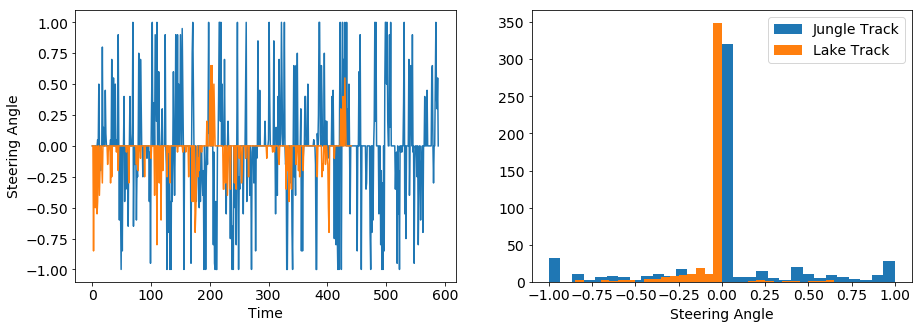

In [12]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
ds = 5
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(y2[::ds])
plt.plot(y1[::ds])
plt.ylabel('Steering Angle')
plt.xlabel('Time')

plt.subplot(1,2,2)
plt.hist(y2[::ds],bins=30)
plt.hist(y1[::ds],bins=30);
plt.xlabel('Steering Angle')
plt.legend(['Jungle Track','Lake Track'])
plt.savefig('plots/angles_distribution.png')


In [32]:
train_g = train_generator(train_samples, batch_size=512,keep_prob=.9 ,min_angle=-100.0, max_angle=100.0)

In [33]:
all_angles_modified = list()
count = 0
for X,y in train_g:
    all_angles_modified.append(y)
    count+=1
    if count>10:
        break
all_angles_modified = np.concatenate(all_angles_modified)

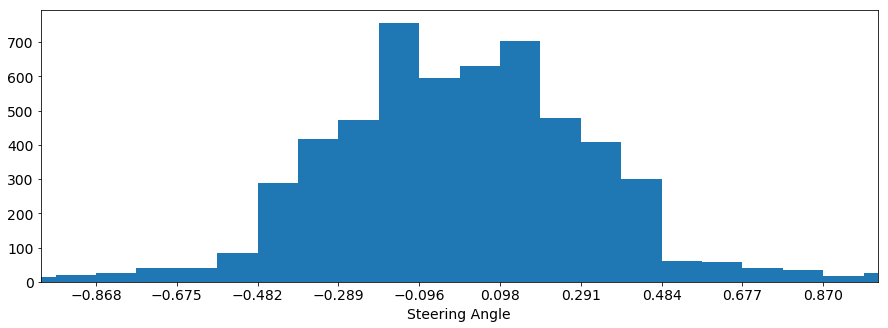

In [34]:
plt.figure(figsize=(15,5))
a = plt.hist(all_angles_modified,30)
plt.xticks(a[1][::2]);
plt.xlim([-1,1])
plt.xlabel('Steering Angle')
plt.savefig('plots/angles_distribution_modified.png')

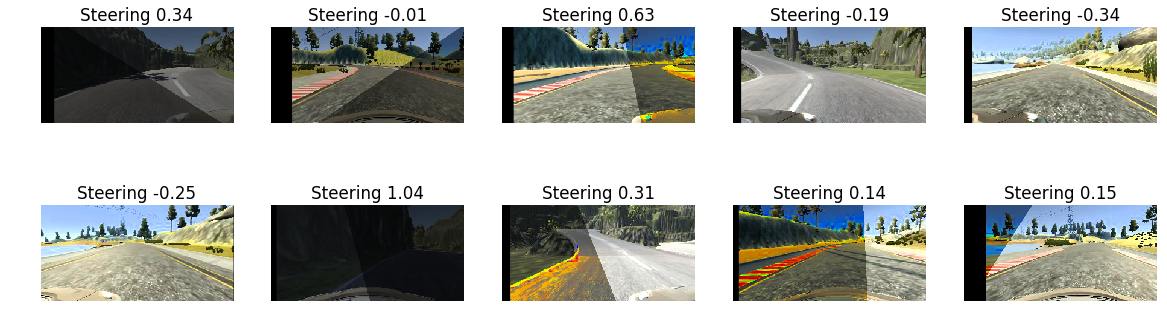

In [45]:
plt.figure(figsize=(20,6))
for i in range(10):
    
    plt.subplot(2,5, i+1)
    plt.imshow(X[i])
    plt.title('Steering %.2f'%(y[i]))
    plt.axis('off') 
plt.savefig('plots/sample_augmented_images.png', bbox_inches='tight')


In [17]:
len(all_angles)

NameError: name 'all_angles' is not defined